## Backpropagation

In [1]:
def affine(x, w, b):
    return w * x + b
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def gaussian(x):
    return np.exp(-x*x)
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))
def mse(y,yout):
    return np.mean((y-yout)*(y-yout))

In [2]:
N = 50000
lr = 0.5

In [7]:
import numpy as np
import matplotlib.pyplot as plt

X = np.linspace(-5.0, 5.0, 50)
x = np.random.choice(X)


In [8]:
X = np.linspace(-5.0, 5.0, 500)

##### initialization

w_1 = np.array([1., -1.])
b_1 = np.array([1., 1.])

w_2 = np.array([1., -1.])
b_2 = np.array([1.])


for i in range(N):
    x = np.random.choice(X)
    actual = gaussian(x)
    
    #### FORWARD PASS
    ### enter your code here 
    z1 = affine(x,w_1[0], b_1[0])
    z2 = affine(x,w_1[1] , b_1[1])
    h1 = sigmoid (z1)
    h2 = sigmoid (z2)
    z3 = w_2[0]*h1 + w_2[1]*h2 + b_2[0]
    
    #### DERIVATIVES CALCULATION
    ### enter your code here 
    h3=z3
    dtau_dh3=-(actual-h3)
    dtau_dz3=dtau_dh3
    dtau_dh1=dtau_dz3*w_2[0]
    dtau_dh2=dtau_dz3*w_2[1]

 

    dtau_dz1=dtau_dh1*sigmoid_derivative(z1)
    dtau_dz2=dtau_dh2*sigmoid_derivative(z2)

 

    dtau_dw10=dtau_dz1*x
    dtau_dw11=dtau_dz2*x

 

    dtau_db10=dtau_dz1
    dtau_db11=dtau_dz2

 

    dtau_dw20=dtau_dz3*h1
    dtau_dw21=dtau_dz3*h2
    dtau_db2=dtau_dz3
    ##### WEIGHTS UPDATE
    ### enter your code here 
    lr=0.01
    w_1[0] = w_1[0] - (lr*dtau_dw10)
    w_1[1]=w_1[1]-(lr*dtau_dw11)
    b_1[0]=b_1[0]-(lr*dtau_db10)
    b_1[1]=b_1[1]-(lr*dtau_db11)
    w_2[0] = w_2[0]-(lr*dtau_dw20)
    w_2[1]=w_2[1]-(lr*dtau_dw21)
    b_2[0]=b_2[0]-(lr*dtau_db2)

Now let's plot things and see what they look like.

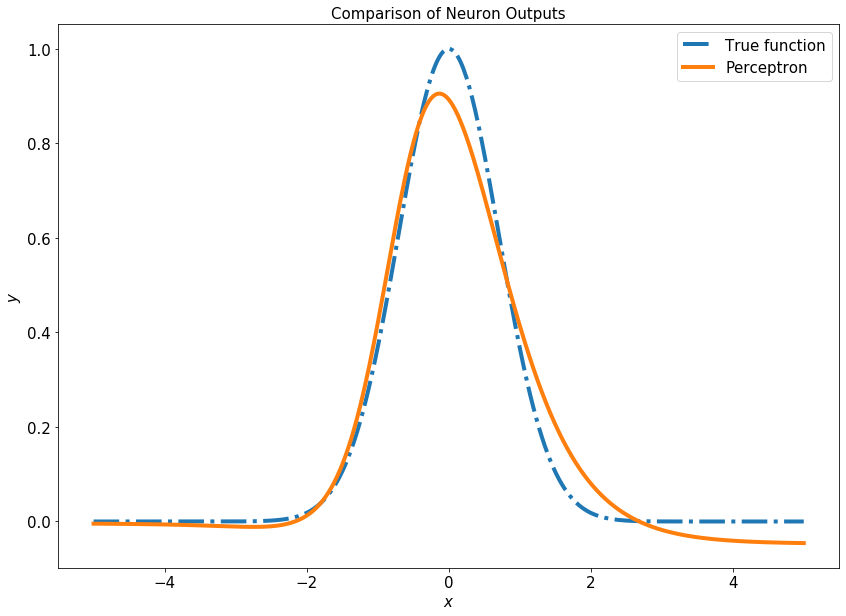

In [9]:
z1 = w_1[0] * X + b_1[0]
z2 = w_1[1] * X + b_1[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

z3 = w_2[0] * h1 + w_2[1] * h2 + b_2[0]
out = z3


SIZE = 15

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(X, gaussian(X), lw=4, ls = '-.', label='True function')
ax.plot(X, out, lw=4, label='Perceptron')
#ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=SIZE)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=SIZE) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=SIZE)

ax.tick_params(labelsize=SIZE) # Make the tick labels big enough to read

ax.legend(fontsize=SIZE, loc='best') # Create a legend and make it big enough to read